Exercitiul 1

Generate a random linear model y = ax1 + b + ϵ where ϵ is random
Gaussian noise with mean μ and variance σ2.

For various values of μ, σ2 generate
data and compute the leverage scores for all the points.

Create four types of
points: regular (low noise, close to the model), high variance on x, high variance
on y and finally high variance on both x and y.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cho_factor, cho_solve

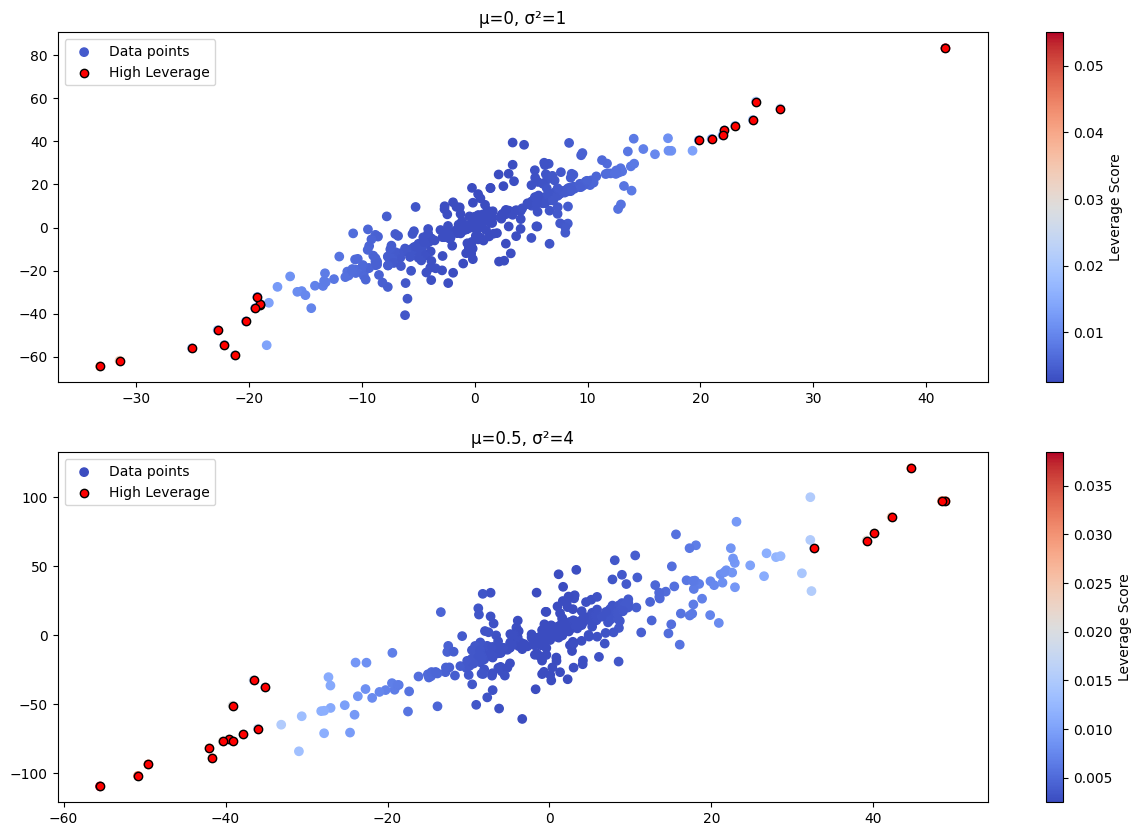

In [49]:
a = 2         
b = 1         
n_samples = 100  

def generate_data(mu, sigma, n_samples=100):
    x_regular = np.random.uniform(-10, 10, n_samples)
    noise = np.random.normal(mu, sigma, n_samples)  
    y_regular = a * x_regular + b + noise
    
    x_high_var_x = x_regular + np.random.normal(mu, sigma * 10, n_samples)
    y_high_var_x = a * x_high_var_x + b + noise
    
    y_high_var_y = a * x_regular + b + np.random.normal(mu, sigma * 10, n_samples)  
    
    x_high_var_xy = x_regular + np.random.normal(mu, sigma * 10, n_samples)
    y_high_var_xy = a * x_high_var_xy + b + np.random.normal(mu, sigma * 10, n_samples) 
    
    return x_regular, y_regular, x_high_var_x, y_high_var_x, x_regular, y_high_var_y, x_high_var_xy, y_high_var_xy

def calculate_leverage_scores(x):
    X = np.vstack((x, np.ones_like(x))).T
    
    XtX = X.T @ X
    
    L, lower = cho_factor(XtX)

    H = X @ cho_solve((L, lower), X.T)

    leverage_scores = np.diag(H)
    
    return leverage_scores

mu_values = [0, 0.5]       
sigma_values = [1, 2] 
fig, axes = plt.subplots(len(mu_values), figsize=(15, 10))

for i in range(len(mu_values)):
    mu = mu_values[i]
    sigma = sigma_values[i]
    x_regular, y_regular, x_high_var_x, y_high_var_x, x_regular, y_high_var_y, x_high_var_xy, y_high_var_xy = generate_data(mu, sigma)
    x = np.concatenate([x_regular, x_high_var_x, x_regular, x_high_var_xy])
    y = np.concatenate([y_regular, y_high_var_x, y_high_var_y, y_high_var_xy])
    
    leverage_scores = calculate_leverage_scores(x)
    ax = axes[i]
    sc = ax.scatter(x, y, c=leverage_scores, cmap='coolwarm', label="Data points")
    ax.set_title(f"μ={mu}, σ²={sigma**2}")
    plt.colorbar(sc, ax=ax, label="Leverage Score")

    high_leverage_points = leverage_scores > np.quantile(leverage_scores, 0.95)
    ax.scatter(x[high_leverage_points], y[high_leverage_points], color='red', edgecolor='black', label="High Leverage")
    ax.legend()


plt.show()

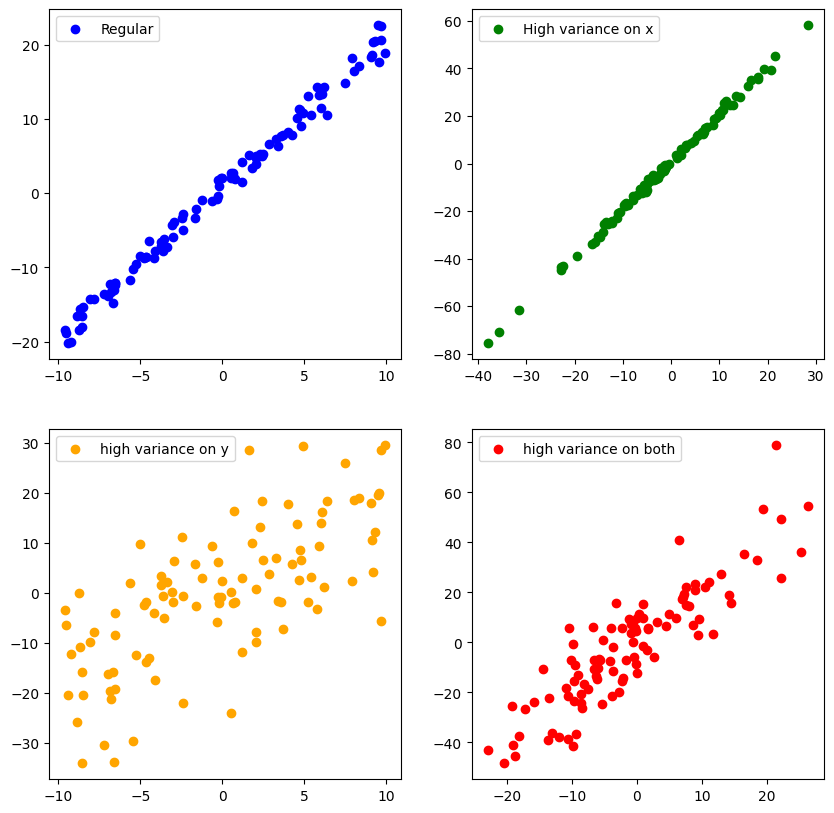

In [47]:
x_regular, y_regular, x_high_var_x, y_high_var_x, x_regular, y_high_var_y, x_high_var_xy, y_high_var_xy = generate_data(0, 1)
 
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(x_regular, y_regular, color='blue', label='Regular')
axs[0, 0].legend()

axs[0, 1].scatter(x_high_var_x, y_high_var_x, color='green', label='High variance on x')
axs[0, 1].legend()

axs[1, 0].scatter(x_regular, y_high_var_y, color='orange', label='high variance on y')
axs[1, 0].legend()

axs[1, 1].scatter(x_high_var_xy, y_high_var_xy, color='red', label='high variance on both')
axs[1, 1].legend()

plt.show()
   

Ex1 - 2D

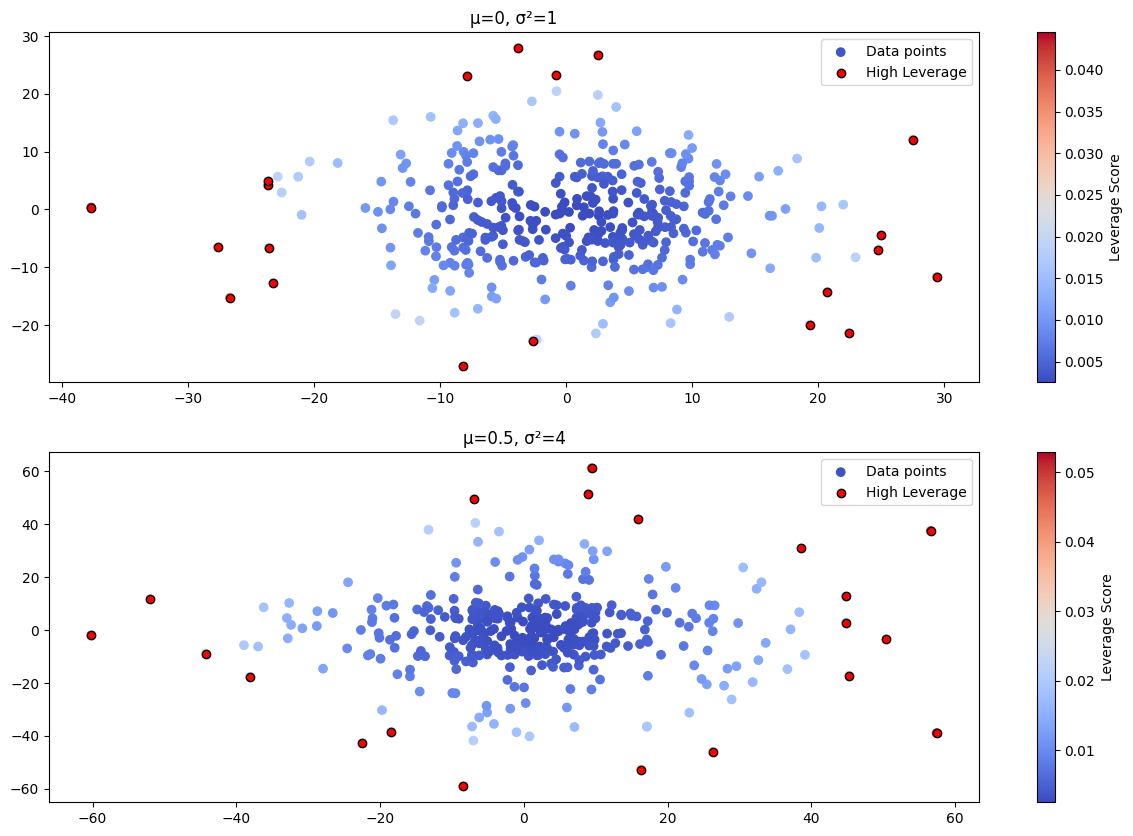

In [3]:
a = 2
b = 1
c = 3
n_samples = 100

def generate_data(mu, sigma, n_samples=100):
    x1_regular = np.random.uniform(-10, 10, n_samples)
    x2_regular = np.random.uniform(-10, 10, n_samples)
    noise = np.random.normal(mu, sigma, n_samples)  
    
    y_regular = a * x1_regular + b * x2_regular + c + noise
    
    x1_high_var = x1_regular + np.random.normal(mu, sigma * 10, n_samples)
    y_high_var_x1 = a * x1_high_var + b * x2_regular + c + noise
    
    x2_high_var = x2_regular + np.random.normal(mu, sigma * 10, n_samples)
    y_high_var_x2 = a * x1_regular + b * x2_high_var + c + noise
    
    x1_high_var_x2 = x1_regular + np.random.normal(mu, sigma * 10, n_samples)
    x2_high_var_x2 = x2_regular + np.random.normal(mu, sigma * 10, n_samples)
    y_high_var_xy = a * x1_high_var_x2 + b * x2_high_var_x2 + c + np.random.normal(mu, sigma * 10, n_samples)
    
    return x1_regular, x2_regular, y_regular, x1_high_var, y_high_var_x1, x2_high_var, y_high_var_x2, x1_high_var_x2, x2_high_var_x2, y_high_var_xy

def calculate_leverage_scores(x1, x2):
    X = np.vstack((x1, x2, np.ones_like(x1))).T 
    
    XtX = X.T @ X
    L, lower = cho_factor(XtX)
    H = X @ cho_solve((L, lower), X.T)
    leverage_scores = np.diag(H)
    
    return leverage_scores

mu_values = [0, 0.5]       
sigma_values = [1, 2] 
fig, axes = plt.subplots(len(mu_values), figsize=(15, 10))

for i in range(len(mu_values)):
    mu = mu_values[i]
    sigma = sigma_values[i]
    (x1_regular, x2_regular, y_regular, x1_high_var, y_high_var_x1,
     x2_high_var, y_high_var_x2, x1_high_var_x2, x2_high_var_x2, y_high_var_xy) = generate_data(mu, sigma)
    
    x1 = np.concatenate([x1_regular, x1_high_var, x1_regular, x1_high_var_x2])
    x2 = np.concatenate([x2_regular, x2_regular, x2_high_var, x2_high_var_x2])
    y = np.concatenate([y_regular, y_high_var_x1, y_high_var_x2, y_high_var_xy])
    
    leverage_scores = calculate_leverage_scores(x1, x2)
    
    ax = axes[i]
    sc = ax.scatter(x1, x2, c=leverage_scores, cmap='coolwarm', label="Data points")
    ax.set_title(f"μ={mu}, σ²={sigma**2}")
    plt.colorbar(sc, ax=ax, label="Leverage Score")

    high_leverage_points = leverage_scores > np.quantile(leverage_scores, 0.95)
    ax.scatter(x1[high_leverage_points], x2[high_leverage_points], color='red', edgecolor='black', label="High Leverage")
    ax.legend()

plt.show()

Exercitiul 2 

generate a 2-dimensional dataset
with 400 train samples and 200 test samples that are organized in 2 clusters,
with 0.1 contamination. Train a KNN model from pyod.models.knn

In [14]:
import pyod.models.knn as knn
import pyod.utils.data as data
from sklearn.metrics import balanced_accuracy_score 

In [26]:
gen_data = data.generate_data_clusters(n_train=400, n_test=200, n_clusters=2, n_features=2, contamination=0.1, random_state=42)


X_train, X_test, y_train, y_test = gen_data
clf = knn.KNN()
clf.fit(X_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

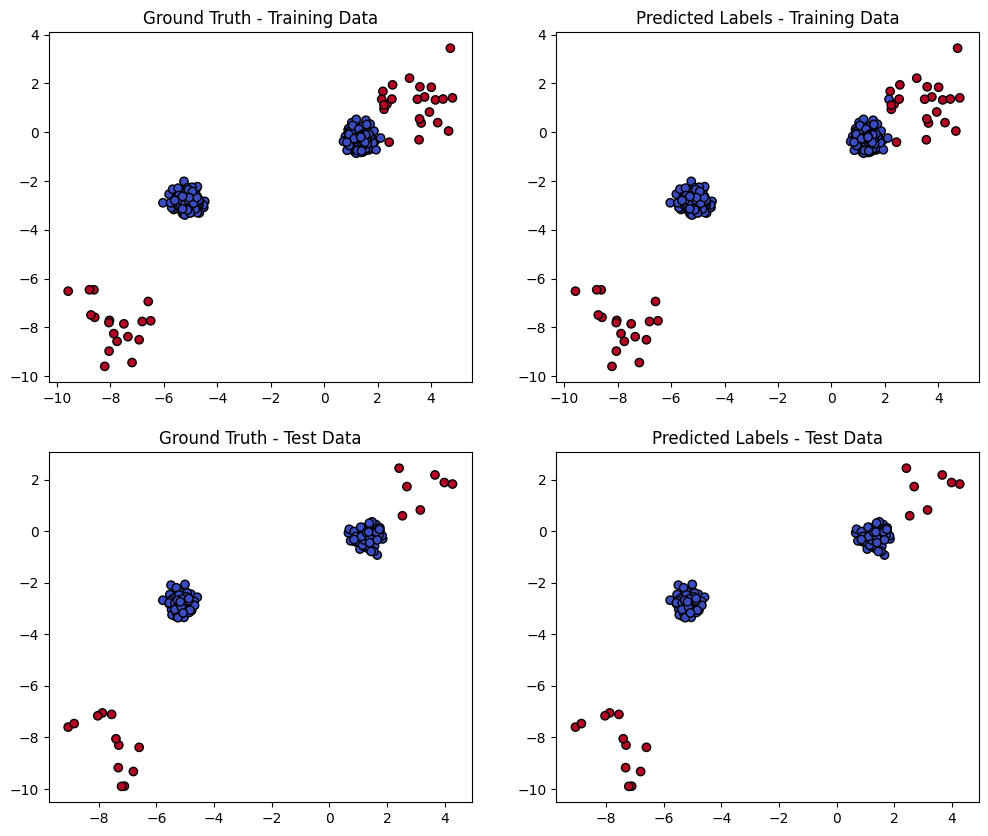

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
axs[0, 0].set_title('Ground Truth - Training Data')

axs[0, 1].scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='coolwarm', edgecolor='k')
axs[0, 1].set_title('Predicted Labels - Training Data')

axs[1, 0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k')
axs[1, 0].set_title('Ground Truth - Test Data')

axs[1, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', edgecolor='k')
axs[1, 1].set_title('Predicted Labels - Test Data')

plt.show()


In [42]:
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print(f"train balanced acc (k=5): {train_balanced_accuracy}")
print(f"test balanced acc (k=5): {test_balanced_accuracy}")

train balanced acc (k=5): 0.9878048780487805
test balanced acc (k=5): 1.0


In [41]:
clf1= knn.KNN(n_neighbors=2)
clf1.fit(X_train)
y_train_pred1 = clf1.predict(X_train)
y_test_pred1 = clf1.predict(X_test)
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred1)
print(f"train balanced acc(k=2): {train_balanced_accuracy}")

train balanced acc(k=2): 0.8156804130715403


Exercitiul 3

Generate 2 clusters (200 and 100 samples respectively) with 2-dimensional samples using(-10, -10) and (10, 10) as centers, 2 and 6 as standard deviations using sklearn.datasets.make blobs() function.


Then, fit KNN and LOF with the generated data using a small contamination rate (0.07) and find the predicted labels.

In [13]:
from sklearn.datasets import make_blobs
from pyod.models.lof import LOF

In [52]:
n_samples = [200, 100] 
centers = [(-10, -10), (10, 10)]  
cluster_std = [2, 6]  

X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

knn_clf = knn.KNN(contamination=0.07)
knn_clf.fit(X)
y_knn_pred = knn_clf.predict(X)

lof_clf = LOF(contamination=0.07)
lof_clf.fit(X)
y_lof_pred = lof_clf.predict(X)


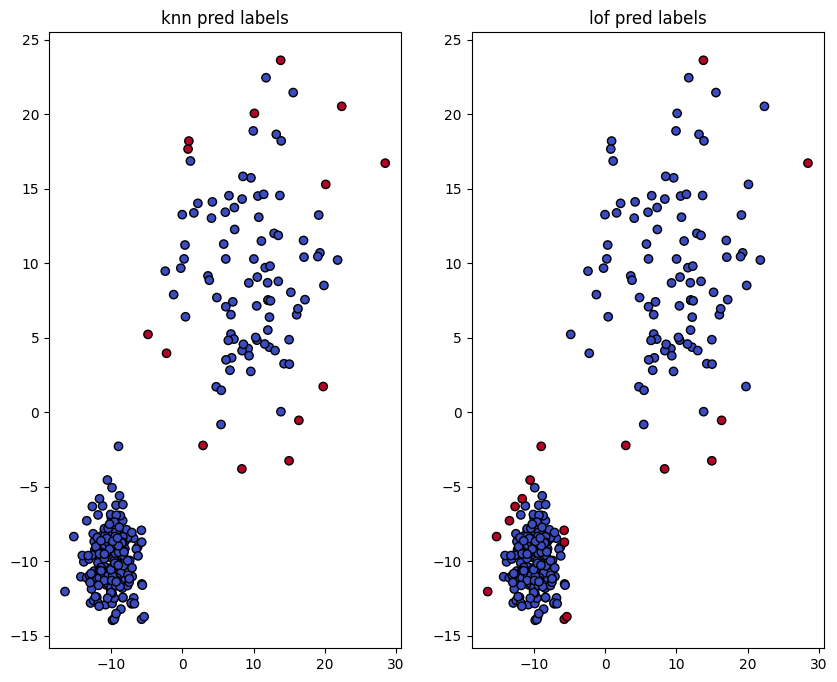

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

axs[0].scatter(X[:, 0], X[:, 1], c=y_knn_pred, cmap='coolwarm', edgecolor='k')
axs[0].set_title('knn pred labels')

axs[1].scatter(X[:, 0], X[:, 1], c=y_lof_pred, cmap='coolwarm', edgecolor='k')
axs[1].set_title('lof pred labels')

plt.show()

Exercitiul 4 

In [18]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization

In [ ]:
data = loadmat('cardio.mat')
X = data['X']
y = data['y'].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
def create_models(model_type):
    train_scores = []
    test_scores = []
    neighbors_range = np.linspace(30, 120, 10, dtype=int)
    
    for n_neighbors in neighbors_range:
        if model_type == 'KNN':
            model = knn.KNN(n_neighbors=n_neighbors)
        else:
            model = LOF(n_neighbors=n_neighbors)
        model.fit(X_train)
        
        y_train_pred = model.labels_  
        y_test_pred = model.predict(X_test)  
        
        train_ba = balanced_accuracy_score(y_train, y_train_pred)
        test_ba = balanced_accuracy_score(y_test, y_test_pred)
        
        train_scores.append(model.decision_scores_) 
        test_scores.append(model.decision_function(X_test)) 
        
        print(f"nr neighbors={n_neighbors}: test ba={test_ba:.4f}")
        
    return train_scores, test_scores



In [33]:
train_scores, test_scores = create_models('KNN')
train_scores = np.array(train_scores).T  
test_scores = np.array(test_scores).T

train_scores_norm, test_scores_norm = standardizer(train_scores, test_scores)

average_train_scores = average(train_scores_norm)
average_test_scores = average(test_scores_norm)
max_train_scores = maximization(train_scores_norm)
max_test_scores = maximization(test_scores_norm)

contamination_rate = 0.1  
threshold_avg = np.quantile(average_train_scores, 1 - contamination_rate)
threshold_max = np.quantile(max_train_scores, 1 - contamination_rate)

average_test_predictions = (average_test_scores > threshold_avg).astype(int)
max_test_predictions = (max_test_scores > threshold_max).astype(int)

ba_avg = balanced_accuracy_score(y_test, average_test_predictions)
ba_max = balanced_accuracy_score(y_test, max_test_predictions)

print(f"average: {ba_avg}")
print(f"max: {ba_max}")

nr neighbors=30: test ba=0.7332
nr neighbors=40: test ba=0.7817
nr neighbors=50: test ba=0.7832
nr neighbors=60: test ba=0.7817
nr neighbors=70: test ba=0.7942
nr neighbors=80: test ba=0.7942
nr neighbors=90: test ba=0.8067
nr neighbors=100: test ba=0.8051
nr neighbors=110: test ba=0.8051
nr neighbors=120: test ba=0.7942
average: 0.794151376146789
max: 0.794151376146789


In [34]:
train_scores, test_scores = create_models('LOF')
train_scores = np.array(train_scores).T  
test_scores = np.array(test_scores).T

train_scores_norm, test_scores_norm = standardizer(train_scores, test_scores)

average_train_scores = average(train_scores_norm)
average_test_scores = average(test_scores_norm)
max_train_scores = maximization(train_scores_norm)
max_test_scores = maximization(test_scores_norm)

contamination_rate = 0.1  
threshold_avg = np.quantile(average_train_scores, 1 - contamination_rate)
threshold_max = np.quantile(max_train_scores, 1 - contamination_rate)

average_test_predictions = (average_test_scores > threshold_avg).astype(int)
max_test_predictions = (max_test_scores > threshold_max).astype(int)

ba_avg = balanced_accuracy_score(y_test, average_test_predictions)
ba_max = balanced_accuracy_score(y_test, max_test_predictions)

print(f"average: {ba_avg}")
print(f"max: {ba_max}")

nr neighbors=30: test ba=0.5523
nr neighbors=40: test ba=0.5444
nr neighbors=50: test ba=0.5459
nr neighbors=60: test ba=0.5740
nr neighbors=70: test ba=0.5865
nr neighbors=80: test ba=0.5975
nr neighbors=90: test ba=0.6146
nr neighbors=100: test ba=0.6271
nr neighbors=110: test ba=0.6396
nr neighbors=120: test ba=0.6551
average: 0.6005351681957187
max: 0.6270642201834863
